# **Moving Average Convergence Divergence (MACD)**
This module focuses on supporting MACD indicator with other indicators to give a better buy and sell signal



> By Srishti Singh

In [1]:
import pandas as pd
import datetime
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates
import plotly.express as px

In [2]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(365)

In [3]:
def get_data(ticker):
  asset = pdr.get_data_yahoo(ticker + ".NS", start = start_date, end = end_date)
  asset.reset_index(inplace = True)
  return asset

In [4]:
rpow = get_data('RPOWER')
rpow

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-24,16.600000,16.700001,16.400000,16.549999,16.549999,2110028
1,2022-10-25,16.650000,16.650000,16.250000,16.299999,16.299999,2691089
2,2022-10-27,16.299999,16.450001,16.100000,16.150000,16.150000,4856846
3,2022-10-28,16.200001,16.299999,15.900000,16.000000,16.000000,4659397
4,2022-10-31,16.150000,16.299999,15.900000,16.100000,16.100000,5233390
...,...,...,...,...,...,...,...
243,2023-10-17,18.450001,18.799999,18.250000,18.549999,18.549999,63936691
244,2023-10-18,18.650000,18.799999,18.100000,18.150000,18.150000,44885996
245,2023-10-19,18.000000,18.850000,18.000000,18.650000,18.650000,85820805
246,2023-10-20,18.650000,19.000000,18.299999,18.500000,18.500000,63826654


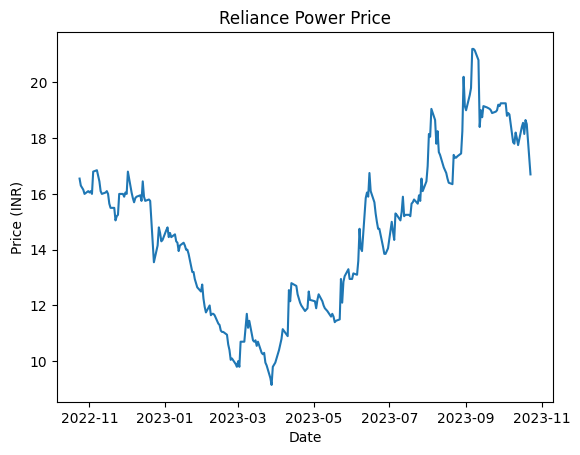

In [5]:
plt.plot(rpow['Date'], rpow['Adj Close'])
plt.title('Reliance Power Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.show()

In [6]:
rpow['ewma_12'] = rpow['Adj Close'].ewm(span = 12).mean()
rpow['ewma_26'] = rpow['Adj Close'].ewm(span = 26).mean()
rpow['macd'] = rpow['ewma_12'] - rpow['ewma_26']
rpow['signal'] = rpow['macd'].ewm(span = 9).mean()
rpow['hist'] = rpow['macd'] - rpow['signal']
rpow

,Date,Open,High,Low,Close,Adj Close,Volume,ewma_12,ewma_26,macd,signal,hist
0,2022-10-24,16.600000,16.700001,16.400000,16.549999,16.549999,2110028,16.549999,16.549999,0.000000,0.000000,0.000000
1,2022-10-25,16.650000,16.650000,16.250000,16.299999,16.299999,2691089,16.414583,16.420192,-0.005609,-0.003116,-0.002493
2,2022-10-27,16.299999,16.450001,16.100000,16.150000,16.150000,4856846,16.311316,16.323114,-0.011798,-0.006674,-0.005124
3,2022-10-28,16.200001,16.299999,15.900000,16.000000,16.000000,4659397,16.213046,16.232786,-0.019740,-0.011100,-0.008640
4,2022-10-31,16.150000,16.299999,15.900000,16.100000,16.100000,5233390,16.182332,16.201992,-0.019661,-0.013647,-0.006014
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-10-17,18.450001,18.799999,18.250000,18.549999,18.549999,63936691,18.426988,18.575564,-0.148576,-0.049825,-0.098751
244,2023-10-18,18.650000,18.799999,18.100000,18.150000,18.150000,44885996,18.384374,18.544041,-0.159666,-0.071793,-0.087873
245,2023-10-19,18.000000,18.850000,18.000000,18.650000,18.650000,85820805,18.425240,18.551890,-0.126650,-0.082764,-0.043885
246,2023-10-20,18.650000,19.000000,18.299999,18.500000,18.500000,63826654,18.436741,18.548046,-0.111305,-0.088473,-0.022832


In [7]:
rpow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       248 non-null    datetime64[ns]
 1   Open       248 non-null    float64       
 2   High       248 non-null    float64       
 3   Low        248 non-null    float64       
 4   Close      248 non-null    float64       
 5   Adj Close  248 non-null    float64       
 6   Volume     248 non-null    int64         
 7   ewma_12    248 non-null    float64       
 8   ewma_26    248 non-null    float64       
 9   macd       248 non-null    float64       
 10  signal     248 non-null    float64       
 11  hist       248 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 23.4 KB


In [8]:
# rpow['regime'] = pd.NA
# for i in range(0, len(rpow) - 1):
#   rpow['hist'][i] >= 0:
#   rpow['regime'][i + 1] = 1
#   else:
#     rpow['regime'][i + 1] = 0

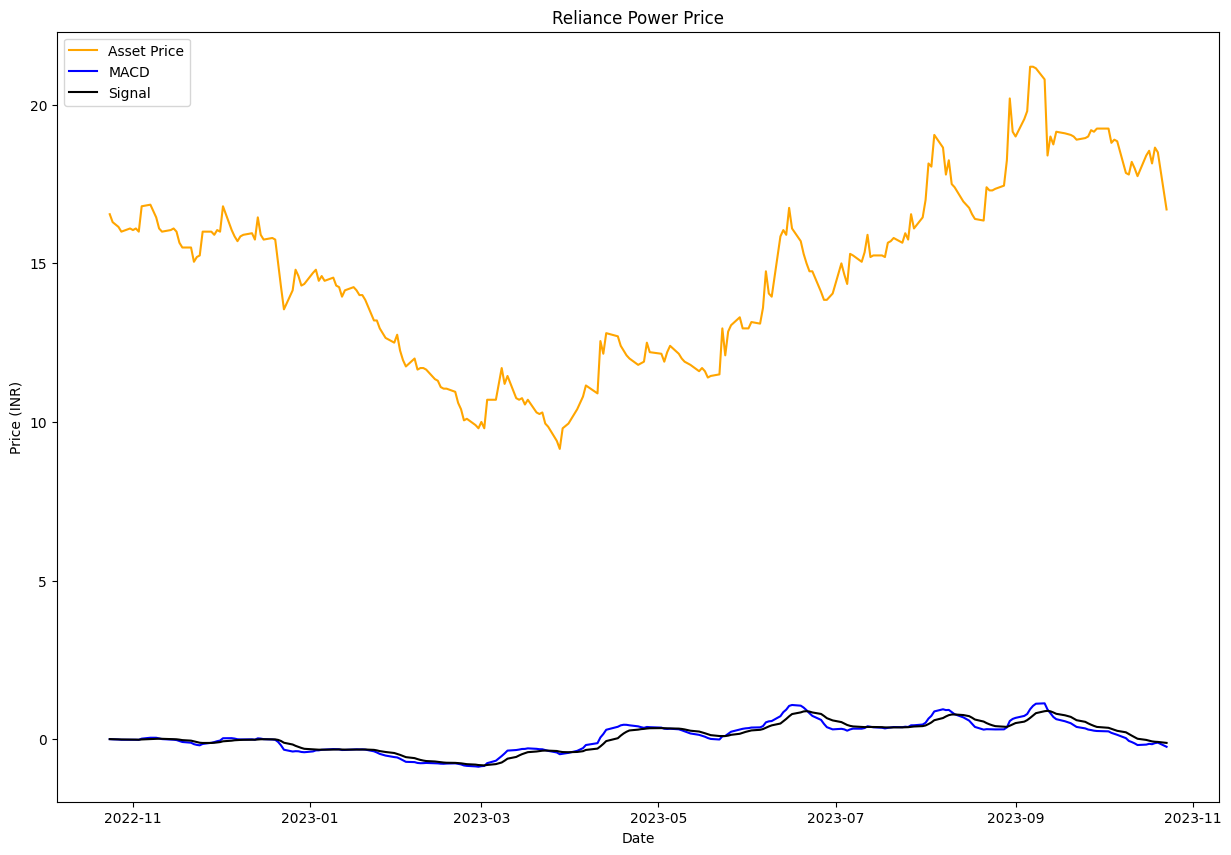

In [9]:
plt.figure(figsize = (15, 10))
plt.plot(rpow['Date'], rpow['Adj Close'], label = 'Asset Price', color = 'orange')
plt.plot(rpow['Date'], rpow['macd'], color = 'blue', label = 'MACD')
plt.plot(rpow['Date'], rpow['signal'], color = 'black', label = 'Signal')
plt.title('Reliance Power Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend(loc = 'upper left')
plt.show()

In [10]:
rpow['ewma_200'] = rpow['Adj Close'].ewm(span = 200).mean()

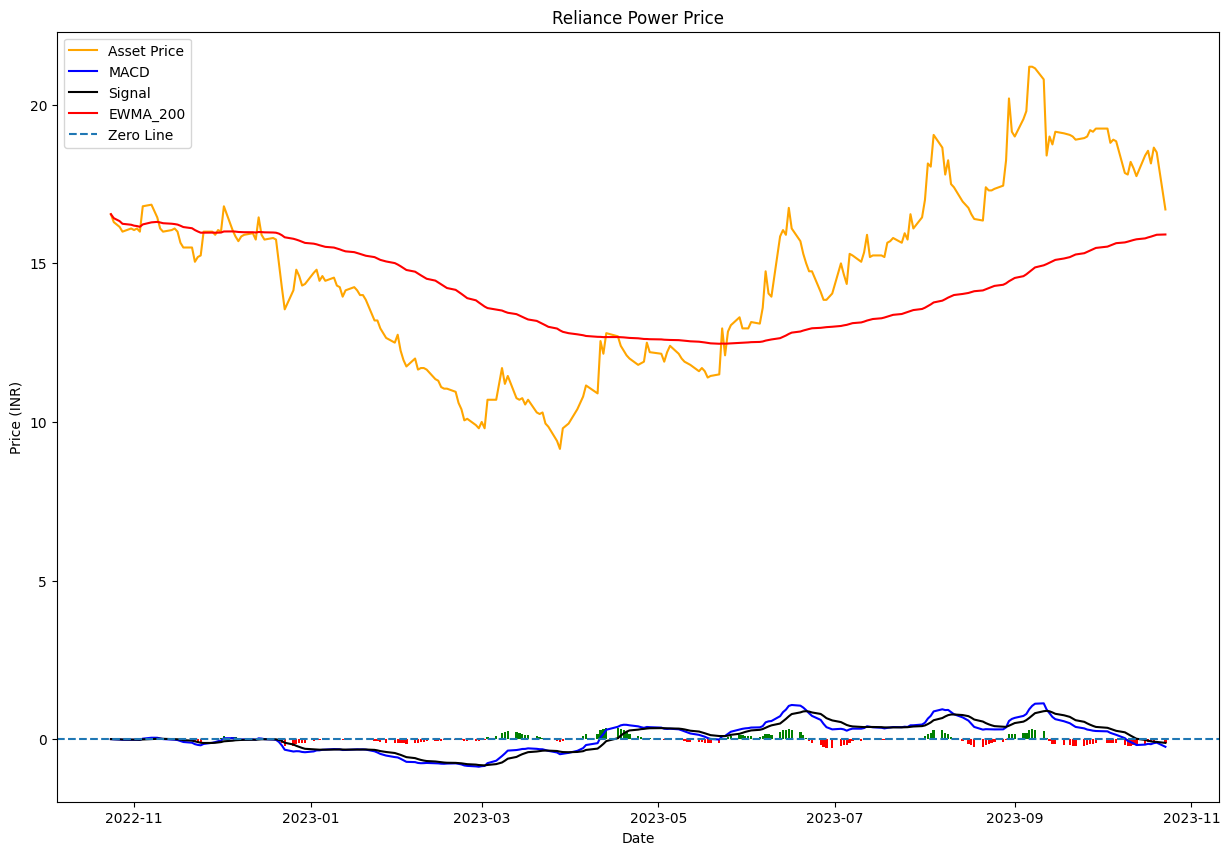

In [11]:
# addition of zero line and histogram
plt.figure(figsize=(15,10))
plt.plot(rpow['Date'], rpow['Adj Close'], label = 'Asset Price', color = 'orange')
plt.plot(rpow['Date'], rpow['macd'], color = 'blue', label = 'MACD')
plt.plot(rpow['Date'], rpow['signal'], color = 'black', label = 'Signal')
plt.plot(rpow['Date'], rpow['ewma_200'], color = 'red', label = 'EWMA_200')
# plt.append_trace(
#     go.Bar(
#         x=rpow.index,
#         y=rpow['hist'],
#         name='histogram',
#         marker_color='black',
#     ), row=2, col=1
# )
# plt.bar(rpow['Date'], rpow['hist'], width = 1)
# plt.bar(x = rpow['Date'], y = rpow['hist'], name = 'Histogram', marker_color='black')
pve_diff = rpow['hist'].copy()
pve_diff[pve_diff < 0] = 0
nve_diff = rpow['hist'].copy()
nve_diff[nve_diff >= 0] = 0
plt.bar(rpow['Date'], pve_diff, color = 'green')
plt.bar(rpow['Date'], nve_diff, color = 'red')

plt.title('Reliance Power Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.axhline(y = 0, linestyle = '--', label = 'Zero Line')
plt.legend(loc = 'upper left')
plt.show()